In [1]:
import pandas as pd
import numpy as np
import re

import seaborn as sns
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline

In [25]:
data= pd.read_csv(r'./data/three_items_amazon_reviews.csv', index_col=0)
print('There are {} different items in the data'.format(len(set(data['ProductId']))))
print('They are {}'.format(str(set(data['ProductId']))))
print('There are {} reviews in the data'.format(len(data)))
data.head()

There are 3 different items in the data
They are {'B003B3OOPA', 'B0026RQTGE', 'B007JFMH8M'}
There are 2168 reviews in the data


,ProductId,Score,Summary,Text
0,B0026RQTGE,5,addictive! but works for night coughing in dogs,my 12 year old sheltie has chronic brochotitis...
1,B0026RQTGE,5,genuine Greenies best price,"These are genuine Greenies product, not a knoc..."
2,B0026RQTGE,5,Perfect for our little doggies,"Our dogs love Greenies, but of course, which d..."
3,B0026RQTGE,5,dogs love greenies,"What can I say, dogs love greenies. They begg ..."
4,B0026RQTGE,5,Greenies review,This review is for a box of Greenies Lite for ...


In [64]:
for i in list(set(data['ProductId'])):
    print(i.join('\n\n'))
    for x in range(2):
        print(data[data['ProductId']==i].reset_index().loc[x, 'Text'])
        print('\n')
        
##then add the items label to each review, ['cookies', 'coconut_oil', 'dog_food']
data['items']= data["ProductId"].replace(dict(zip(list(np.unique(np.array(data.ProductId), return_index=True)[0]), ['dog_food', 'coconut_oil', 'cookies'])))


B003B3OOPA

Coconut Oil is so tasty, it goes great with anything sweet. I use it on a piece of bread with honey, so good. It is also good for Asian style sweet dishes, gives an excellent flavor. If you using it as a dietary supplement by taking a tablespoon; it can be quite difficulty to swallow because of the texture. One thing about this oil is it doesn't refrigerate well and at 76 Fahrenheit it melts completely.


This was my first time to try coconut oil, other than using the red kind for popcorn. [which works great in a Stir Crazy] I will be repeating what many have said, but just to add my thoughts....I hope Amazon stocks this FOREVER !!  Smells lovely, like coconut, reminds me of the beach. At room temperature, it is solid....and if I have one tiny complaint, it can be a little difficult to spoon out of the jar. I don't want to soften/melt it each time I need a teaspoonful, so I struggle a bit and scoop it out.<br /><br />  On toast or English muffins, you can use it just like 

We can see these three items are coconut oil, dog food, cookies.<br> These three items are distinctive but also shares some common features in users' comment. 

### Purpose:
#### The goal is to cluster the review texts into appropriate number of clusters, assuming we don't know their products. We can evaluate our clustering result by comparing with correct products those reviews describes. 

### Preprocessing:

In [4]:
## Handle contraction words
# A list of contractions from http://stackoverflow.com/questions/19790188/expanding-english-language-contractions-in-python
contractions = { 
"ain't": "am not",
"aren't": "are not",
"can't": "cannot",
"can't've": "cannot have",
"'cause": "because",
"could've": "could have",
"couldn't": "could not",
"couldn't've": "could not have",
"didn't": "did not",
"doesn't": "does not",
"don't": "do not",
"hadn't": "had not",
"hadn't've": "had not have",
"hasn't": "has not",
"haven't": "have not",
"he'd": "he would",
"he'd've": "he would have",
"he'll": "he will",
"he's": "he is",
"how'd": "how did",
"how'll": "how will",
"how's": "how is",
"i'd": "i would",
"i'll": "i will",
"i'm": "i am",
"i've": "i have",
"isn't": "is not",
"it'd": "it would",
"it'll": "it will",
"it's": "it is",
"let's": "let us",
"ma'am": "madam",
"mayn't": "may not",
"might've": "might have",
"mightn't": "might not",
"must've": "must have",
"mustn't": "must not",
"needn't": "need not",
"oughtn't": "ought not",
"shan't": "shall not",
"sha'n't": "shall not",
"she'd": "she would",
"she'll": "she will",
"she's": "she is",
"should've": "should have",
"shouldn't": "should not",
"that'd": "that would",
"that's": "that is",
"there'd": "there had",
"there's": "there is",
"they'd": "they would",
"they'll": "they will",
"they're": "they are",
"they've": "they have",
"wasn't": "was not",
"we'd": "we would",
"we'll": "we will",
"we're": "we are",
"we've": "we have",
"weren't": "were not",
"what'll": "what will",
"what're": "what are",
"what's": "what is",
"what've": "what have",
"where'd": "where did",
"where's": "where is",
"who'll": "who will",
"who's": "who is",
"won't": "will not",
"wouldn't": "would not",
"you'd": "you would",
"you'll": "you will",
"you're": "you are"
}
def clean_text(text, remove_stopwords = True):
    '''Remove unwanted characters, stopwords, and format the text to create fewer nulls word embeddings'''
    
    # Convert words to lower case
    text = text.lower()
    
    # Replace contractions with their longer forms 
    if True:
        text = text.split()
        new_text = []
        for word in text:
            if word in contractions:
                new_text.append(contractions[word])
            else:
                new_text.append(word)
        text = " ".join(new_text)
    
    # Format words and remove unwanted characters
    text = re.sub(r'https?:\/\/.*[\r\n]*', '', text, flags=re.MULTILINE)
    text = re.sub(r'\<a href', ' ', text)
    text = re.sub(r'&amp;', '', text) 
    text = re.sub(r'[_"\-;%()|+&=*%.,!?:#$@\[\]/:<>~/\\]', ' ', text)
    text = re.sub(r'<br />', ' ', text)
    text = re.sub(r' br ', ' ', text)
    text = re.sub(r'\'', ' ', text)
    
    # Optionally, remove stop words
#     if remove_stopwords:
#         text = text.split()
#         stops = set(stopwords.words("english"))
#         text = [w for w in text if not w in stops]
#         text = " ".join(text)

    return text
pure_texts=[clean_text(review) for review in data['Text']]
data['Text']=pure_texts
data.head()

,ProductId,Score,Summary,Text,items
0,B0026RQTGE,5,addictive! but works for night coughing in dogs,my 12 year old sheltie has chronic brochotitis...,dog_food
1,B0026RQTGE,5,genuine Greenies best price,these are genuine greenies product not a knoc...,dog_food
2,B0026RQTGE,5,Perfect for our little doggies,our dogs love greenies but of course which d...,dog_food
3,B0026RQTGE,5,dogs love greenies,what can i say dogs love greenies they begg ...,dog_food
4,B0026RQTGE,5,Greenies review,this review is for a box of greenies lite for ...,dog_food


In [5]:
##Tokenization

# ## treebank tokenizer (it splits tokens based on white space and punctuation.)
# from nltk.tokenize import word_tokenize
# tb_token=data['pure_texts'].apply(lambda x: word_tokenize(x))

## better use some custom version of tokenizer, such as nltk.tokenize.casual.TweetTokenize
## better in this example: '"This is a cooool #dummysmiley: :-) :-P <3 and some arrows < > -> <--"'
from nltk.tokenize import TweetTokenizer
tw_token =data['Text'].apply(lambda x: TweetTokenizer().tokenize(x))
tw_token[0:2]

0    [my, 12, year, old, sheltie, has, chronic, bro...
1    [these, are, genuine, greenies, product, not, ...
Name: Text, dtype: object

In [6]:
## Part-of-speech-tagging

from nltk.tag import pos_tag
pos_token=tw_token.apply(lambda x: pos_tag(x))
# pos_token[:2]

## change the pos_tag of default into the tags that lemmatizer can understand:
def pos_change(pos):
    if pos.startswith('J'):
        return 'a'
    elif pos.startswith('V'):
        return 'v'
    elif pos.startswith('R'):
        return 'r'
    else:
        return 'n'
def replace_pos_tag_with_lem_pos(list_of_tuples):
    return [(tp[0], pos_change(tp[1])) for tp in list_of_tuples]
from nltk.tag import pos_tag
# replace_pos_tag_with_lem_pos(pos_tag(word_tokenize('I love you a lot')))
pos_token=tw_token.apply(lambda x: replace_pos_tag_with_lem_pos(pos_tag(x)))
pos_token[:2]

0    [(my, n), (12, n), (year, n), (old, a), (shelt...
1    [(these, n), (are, v), (genuine, a), (greenies...
Name: Text, dtype: object

In [7]:
## Lemmatizing / Stemming
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()
lem_token=pos_token.apply(lambda x: [lemmatizer.lemmatize(w_tuple[0], w_tuple[1]) for w_tuple in x])
lem_token[:2]

0    [my, 12, year, old, sheltie, have, chronic, br...
1    [these, be, genuine, greenies, product, not, a...
Name: Text, dtype: object

### Matrix design:
word-by-word matrix<br>
word-by-document matrix <br>
Here I choose word-by-document matrix, since it's easy to understand and implement. Based on my experience, in the unsupervised learning tasks on text data like literature clustering, simple method outperforms complicated ones

#### Word-by-document matrix:
n-gram: unigram and bigram<br>
Hashing vector: matrix of token occurrences with L2 normalization <br>
Tf-idf vector: normalized tf-idf matrix <br>

In [67]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer, HashingVectorizer
## Count of words in word-by-document matrix
## tfidf of words in word-by-document matrix
## normalized version of countVectorizer

#convert token back to review texts (normalized version)
lem_texts=[]
for review in lem_token:
    normalized=" ".join(word for word in review)
    lem_texts.append(normalized)

data['pure_text']= lem_texts
data=data.drop(data.index[data['pure_text'] ==''].tolist()).reset_index(drop=True)
lem_texts=data['pure_text'].tolist()

# ##count vector
# cv_uni=CountVectorizer(ngram_range=(1,1))
# cv_bi= CountVectorizer(ngram_range=(2,2))
# cv_uni_emb=cv_uni.fit_transform(lem_texts)
# cv_bi_emb=cv_bi.fit_transform(lem_texts)

# hash vectorizer with unigram
hv_uni = HashingVectorizer(ngram_range=(1, 1), analyzer=lambda l:l, n_features=2**12)
hv_uni_emb= hv_uni.fit_transform(lem_texts).toarray()
print(hv_uni_emb.shape)

# hash vectorizer with bigrams
hv_bi = HashingVectorizer(ngram_range=(2, 2), analyzer=lambda l:l, n_features=2**12)
hv_bi_emb= hv_bi.fit_transform(lem_texts).toarray()
print(hv_bi_emb.shape)


## tf_idf with unigram
tfidf_uni = TfidfVectorizer(ngram_range = (1,1)) 
tfidf_uni_emb = tfidf_uni.fit_transform(lem_texts).toarray()
print(tfidf_uni_emb.shape)

## tf_idf with bgram
tfidf_bi = TfidfVectorizer(ngram_range = (2,2)) 
tfidf_bi_emb = tfidf_bi.fit_transform(lem_texts).toarray()
print(tfidf_bi_emb.shape)

(2164, 4096)
(2164, 4096)
(2164, 5402)
(2164, 46742)


### Dimensionality reduction (to visulize in 2D or 3D plot)
LSA <br>t-SNE <br>PCA

In [39]:
##LSA
from sklearn.decomposition import TruncatedSVD

svd_2 = TruncatedSVD(n_components=2, n_iter=8, random_state=28)
tfidf_uni_emb_2= svd_2.fit_transform(tfidf_uni_emb)
tfidf_uni_emb_2[0:2]

array([[ 0.26366112,  0.01497516],
       [ 0.32134591, -0.03089903]])

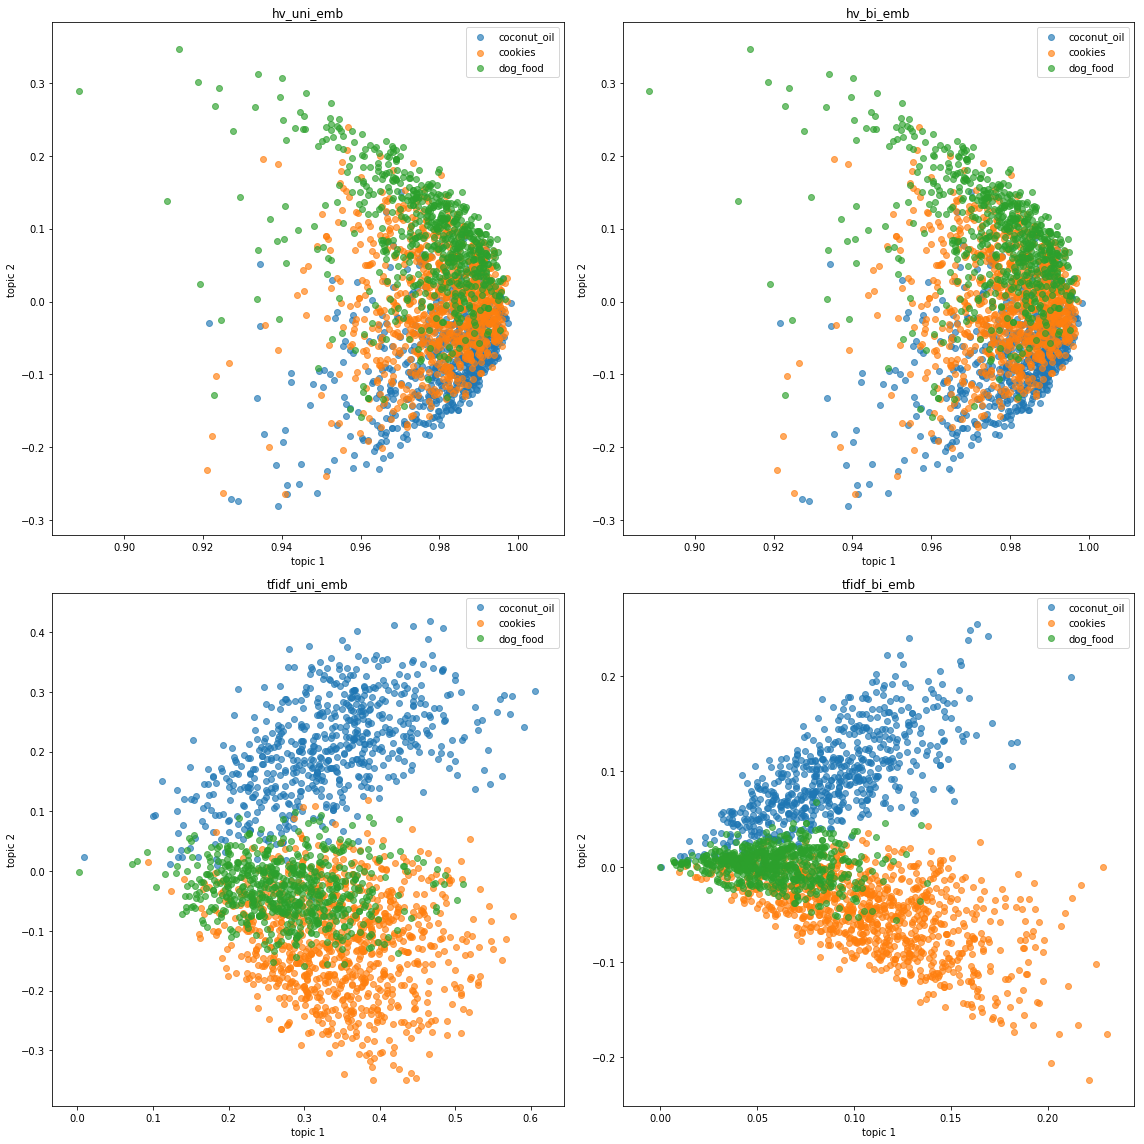

In [56]:
all_mat=[hv_uni_emb, hv_bi_emb, tfidf_uni_emb, tfidf_bi_emb]
titles= ['hv_uni_emb', 'hv_bi_emb', 'tfidf_uni_emb', 'tfidf_bi_emb']
svd_2 = TruncatedSVD(n_components=2, n_iter=8, random_state=28)


fig, axes = plt.subplots(2, 2, figsize=(16, 16)) #, sharex='all', sharey='all'



for i, mat in enumerate(all_mat):
    r= int(i/2)
    c=int((i-(r*2)))
    lsa_emb= svd_2.fit_transform(mat)
    lsa_emb_label= pd.DataFrame({'topic_1': lsa_emb[:,0], 'topic_2': lsa_emb[:,1], 'items': data['items'].tolist()})
    groups = lsa_emb_label.groupby('items')
    cdict= dict(zip(list(groups.groups.keys()), ['red', 'blue', 'green'])) 
    
    for name, group in groups:
        axes[r,c].scatter(x=group.topic_1, y=group.topic_2,
             marker = 'o', alpha = 0.65,
             cmap=cdict[name], label= name
        )
        axes[r,c].set_xlabel('topic 1')
        axes[r,c].set_ylabel('topic 2')
        axes[r,c].set_title(titles[i])
        axes[r,c].legend()
        
plt.tight_layout()


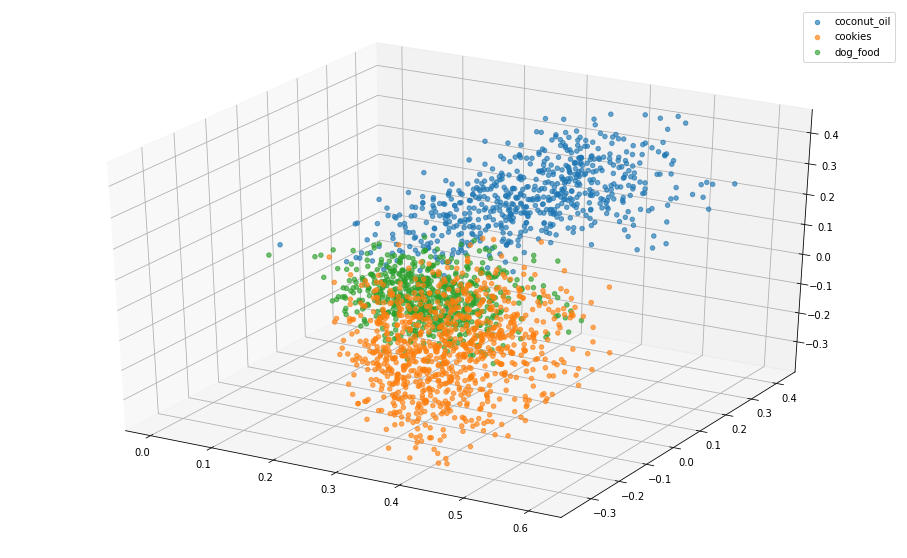

In [65]:
# ## 3-D graph

svd_3 = TruncatedSVD(n_components=3, n_iter=8, random_state=28)
lsa_emb= svd_3.fit_transform(tfidf_uni_emb)

lsa_emb_label= pd.DataFrame({'topic_1': lsa_emb[:,0], 'topic_2': lsa_emb[:,1], 'topic_3':lsa_emb[:,1], 'items': data['items'].tolist()})
groups = lsa_emb_label.groupby('items')
cdict= dict(zip(list(groups.groups.keys()), ['red', 'blue', 'green'])) 

ax = plt.figure(figsize=(16,10)).gca(projection='3d')
for name, group in groups:
    ax.scatter(xs=group.topic_1, ys=group.topic_2,zs=group.topic_3,
         marker = 'o', alpha = 0.65,
         cmap=cdict[name], label= name
    )
    ax.legend()
plt.show()

# ## 3-D graph
# ax = plt.figure(figsize=(16,10)).gca(projection='3d')
# ax.scatter(
#     xs=lsa_emb[:,0],
#     ys=lsa_emb[:,1],
#     zs=lsa_emb[:,2],
# #     c=some_label,
#     cmap='tab10'
# )
# ax.set_xlabel('topic-one')
# ax.set_ylabel('topic-two')
# ax.set_zlabel('topic-three')
# plt.show()




[t-SNE] Computing 16 nearest neighbors...
[t-SNE] Indexed 2164 samples in 0.345s...
[t-SNE] Computed neighbors for 2164 samples in 38.143s...
[t-SNE] Computed conditional probabilities for sample 1000 / 2164
[t-SNE] Computed conditional probabilities for sample 2000 / 2164
[t-SNE] Computed conditional probabilities for sample 2164 / 2164
[t-SNE] Mean sigma: 0.037200
[t-SNE] KL divergence after 250 iterations with early exaggeration: 95.764900
[t-SNE] KL divergence after 1000 iterations: 2.362721
[t-SNE] Computing 16 nearest neighbors...
[t-SNE] Indexed 2164 samples in 0.326s...
[t-SNE] Computed neighbors for 2164 samples in 38.236s...
[t-SNE] Computed conditional probabilities for sample 1000 / 2164
[t-SNE] Computed conditional probabilities for sample 2000 / 2164
[t-SNE] Computed conditional probabilities for sample 2164 / 2164
[t-SNE] Mean sigma: 0.037200
[t-SNE] KL divergence after 250 iterations with early exaggeration: 95.399681
[t-SNE] KL divergence after 1000 iterations: 2.38617

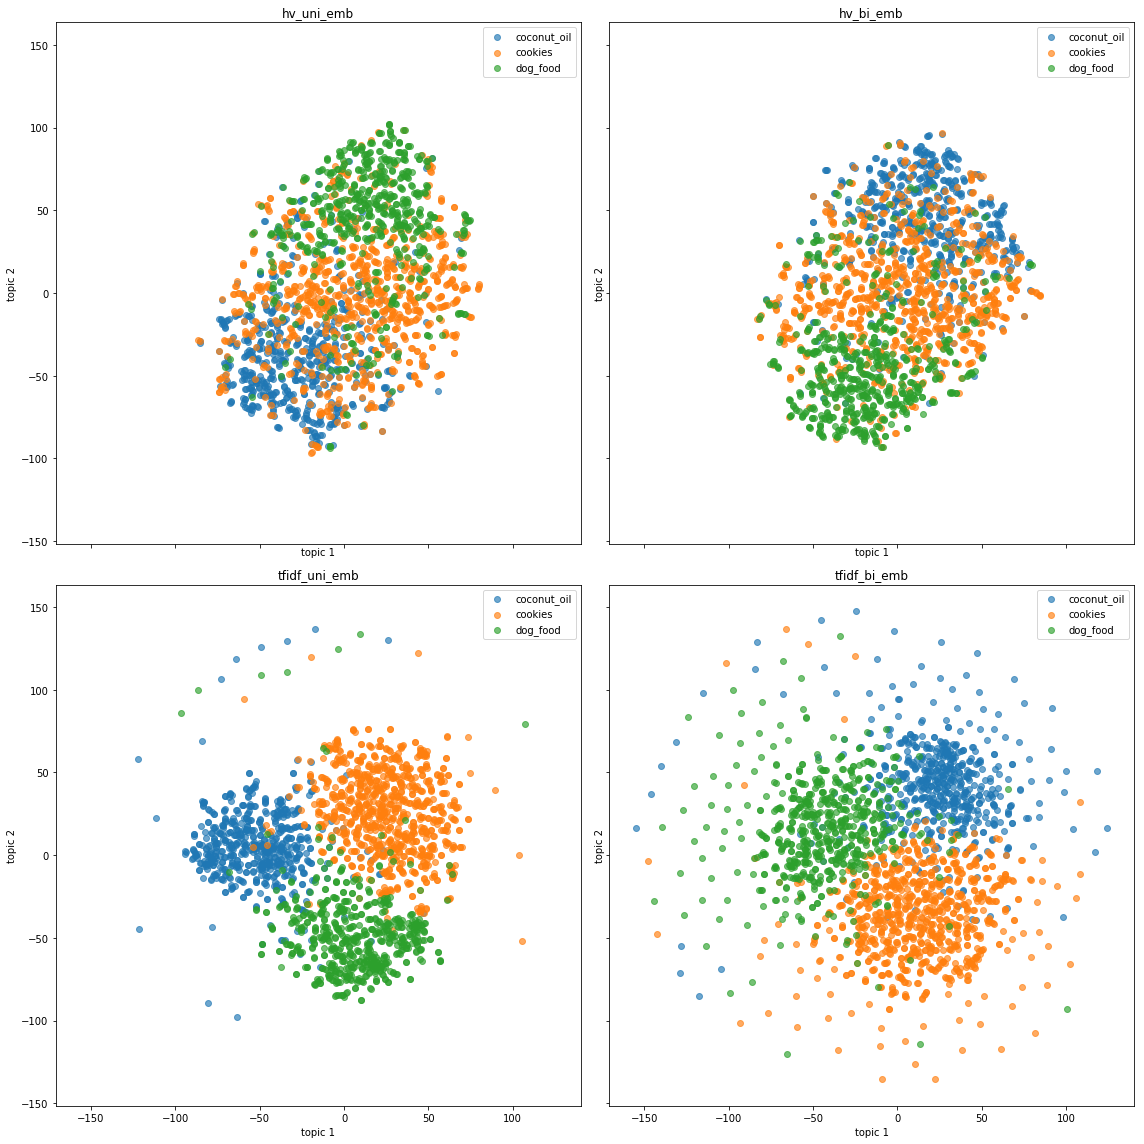

In [66]:
## t-SNE
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2, verbose=1, perplexity=5,  random_state=28)

all_mat=[hv_uni_emb, hv_bi_emb, tfidf_uni_emb, tfidf_bi_emb]
titles= ['hv_uni_emb', 'hv_bi_emb', 'tfidf_uni_emb', 'tfidf_bi_emb']

fig, axes = plt.subplots(2, 2, figsize=(16, 16), sharex='all', sharey='all')


for i, mat in enumerate(all_mat):
    r= int(i/2)
    c=int((i-(r*2)))
    tsne_emb= tsne.fit_transform(mat)
    tsne_emb_label= pd.DataFrame({'topic_1': tsne_emb[:,0], 'topic_2': tsne_emb[:,1], 'items': data['items'].tolist()})
    groups = tsne_emb_label.groupby('items')
    cdict= dict(zip(list(groups.groups.keys()), ['red', 'blue', 'green'])) 
    
    for name, group in groups:
        axes[r,c].scatter(x=group.topic_1, y=group.topic_2,
             marker = 'o', alpha = 0.65,
             cmap=cdict[name], label= name
        )
        axes[r,c].set_xlabel('topic 1')
        axes[r,c].set_ylabel('topic 2')
        axes[r,c].set_title(titles[i])
        axes[r,c].legend()
        
plt.tight_layout()



It seems tf-idf unigram embedding works the best in our dataset, among our four different types of sentence embedding. <br>
Also, tf-idf vector performs much better than hashing vector.<br>
So we will use this tf-idf unigram embedding in the folowing procedures.

### Clustering
Here I use K-means. But there're a few other methods, e.g., k-median, depending on the data.
https://towardsdatascience.com/the-5-clustering-algorithms-data-scientists-need-to-know-a36d136ef68 <br>

From the previous visulization, the density-based clustering method like DBSCAN should also work.

In [9]:
from sklearn import cluster
from sklearn import metrics

## silhouette method to find the best K:
def get_silhouette_scores(mat):
    X=mat
    silhouette_scores=[]
    k_value= list(range(2,7))
    for k in range(2, 7): ##2-7
        kmeans = cluster.KMeans(n_clusters=k)
        kmeans.fit(X)
        labels = kmeans.labels_
        silhouette_score = metrics.silhouette_score(X, labels, metric='cosine') ## euclidean
        silhouette_scores.append(silhouette_score)
    return silhouette_scores

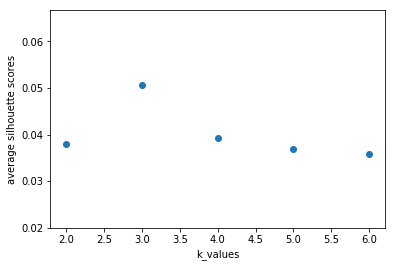

In [76]:
plt.scatter(list(range(2,7)), get_silhouette_scores(tfidf_uni_emb))
plt.xlabel('k_values')
plt.ylabel('average silhouette scores')
plt.show()

This method shows three is always the best number of clusters. Assuming we don't know these reviews are for three items, we are able to create three clusters from the method above.

In [10]:
##K-means clustering on tf_idf_uni with 3 clusters:
from sklearn.cluster import KMeans
from sklearn.manifold import TSNE

k = 3
kmeans = KMeans(n_clusters=k, n_jobs=4, verbose=10)
y_pred = kmeans.fit_predict(tfidf_uni_emb)
tsne_2d=TSNE(n_components=2, verbose=1, perplexity=5,  random_state=28)
emb_2d = tsne_2d.fit_transform(tfidf_uni_emb)
# plt.scatter(emb_2d[:, 0], emb_2d[:, 1], c=y_pred, s=20,alpha=.5)

# labels = kmeans.labels_
# centroids = kmeans.cluster_centers_

[t-SNE] Computing 16 nearest neighbors...
[t-SNE] Indexed 2164 samples in 0.365s...
[t-SNE] Computed neighbors for 2164 samples in 49.640s...
[t-SNE] Computed conditional probabilities for sample 1000 / 2164
[t-SNE] Computed conditional probabilities for sample 2000 / 2164
[t-SNE] Computed conditional probabilities for sample 2164 / 2164
[t-SNE] Mean sigma: 0.174900
[t-SNE] KL divergence after 250 iterations with early exaggeration: 101.026199
[t-SNE] KL divergence after 1000 iterations: 2.288295


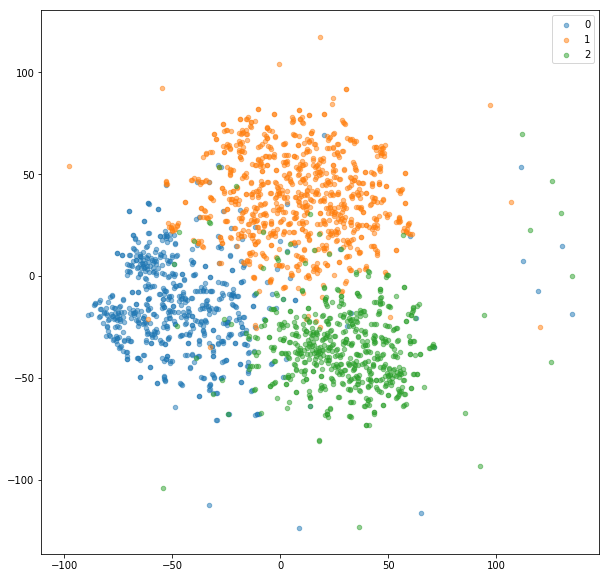

In [11]:
plt.figure(figsize=(10,10))

tsne_emb_label= pd.DataFrame({'topic_1': emb_2d[:,0], 'topic_2': emb_2d[:,1], 'predicted_clusters': y_pred})
groups = tsne_emb_label.groupby('predicted_clusters')
cdict= dict(zip(list(groups.groups.keys()), ['red', 'blue', 'green'])) 

for name, group in groups:
    plt.scatter(x=group.topic_1, y=group.topic_2,
         marker = 'o', alpha = 0.5,
         cmap=cdict[name], label= name, s=20
    )
    plt.legend()
    
#     plt.annotate(name, 
#              tsne_emb_label.loc[tsne_emb_label['predicted_clusters']==name,['topic_1','topic_2']].mean(),
#              horizontalalignment='center',
#              verticalalignment='center',
#              size=20, weight='bold',
#              color=cdict[name]) 
plt.show()


### Evaluation

In [68]:
data['assigned_cluster']= y_pred
## build a custom matrix to see how many each item is commented in each cluster
pd.pivot_table(data,index=["assigned_cluster", "items"],values=['pure_text'],aggfunc=[len])

len
                             pure_text
assigned_cluster items                
0                coconut_oil        11
                 cookies            11
                 dog_food          623
1                coconut_oil         2
                 cookies           896
                 dog_food            1
2                coconut_oil       610
                 cookies             5
                 dog_food            5

In [21]:
data.head()

,ProductId,Score,Summary,Text,items,pure_text,assigned_cluster
0,B0026RQTGE,5,addictive! but works for night coughing in dogs,my 12 year old sheltie has chronic brochotitis...,dog_food,my 12 year old sheltie have chronic brochotiti...,0
1,B0026RQTGE,5,genuine Greenies best price,these are genuine greenies product not a knoc...,dog_food,these be genuine greenies product not a knocko...,0
2,B0026RQTGE,5,Perfect for our little doggies,our dogs love greenies but of course which d...,dog_food,our dog love greenies but of course which dogg...,0
3,B0026RQTGE,5,dogs love greenies,what can i say dogs love greenies they begg ...,dog_food,what can i say dog love greenies they begg for...,0
4,B0026RQTGE,5,Greenies review,this review is for a box of greenies lite for ...,dog_food,this review be for a box of greenies lite for ...,0


#### It looks pretty acurate that our clusters correspond perfectly to their correct items.
#### Cluster 0: cookies; cluster 1: coconut oil; cluster 2: dog_food

In [69]:
from sklearn.metrics import accuracy_score
item_to_cluster=['dog_food', 'cookies', 'coconut_oil']
true_label= [item_to_cluster.index(i) for i in data['items']]
acc=accuracy_score(true_label, data['assigned_cluster'])
print('Overall accuracy of our clusters matching the correct classes is {}'.format(acc))

Overall accuracy of our clusters matching the correct classes is 0.9838262476894639


In [83]:
data.Score.unique()

array([5, 4, 1, 3, 2])

## Interactive plot of our clusters

In [147]:
## Bokeh tutorials: https://vishalmnemonic.github.io/DC13/
from bokeh.models import ColumnDataSource, HoverTool, LinearColorMapper, CustomJS
from bokeh.palettes import Category20
from bokeh.transform import linear_cmap
from bokeh.io import output_file, show
from bokeh.transform import transform
from bokeh.io import output_notebook
from bokeh.plotting import figure
from bokeh.layouts import column
from bokeh.models import RadioButtonGroup
# from bokeh.models import CheckboxButtonGroup
from bokeh.models import Select
from bokeh.models import TextInput
from bokeh.layouts import gridplot
from bokeh.models import Div
from bokeh.models import Paragraph
from bokeh.layouts import column, widgetbox
from bokeh.plotting import figure, curdoc

# output_notebook()
y_labels = y_pred

# data sources
source = ColumnDataSource(data=dict(
    x= tsne_emb_label['topic_1'], 
    y= tsne_emb_label['topic_2'],
    x_backup = tsne_emb_label['topic_1'],
    y_backup = tsne_emb_label['topic_2'],
    desc= y_labels, 
    item= data['items'],
    score = data['Score'],
    summary = data['Summary'],
    text = data['pure_text'],
    labels = ["Cluster-" + str(x) for x in y_labels]
    ))

# hover over information
hover = HoverTool(tooltips=[
    ("Item", "@item"),
    ("Score", "@score"),
    ("Summary", "@summary"),
    ("Text", "@text"),
],
                 point_policy="follow_mouse")

# map colors
mapper = linear_cmap(field_name='desc', 
                     palette= "Viridis256", #Category20[20],
                     low=min(y_labels) ,high=max(y_labels))

# prepare the figure
p = figure(plot_width=800, plot_height=800, 
           tools=[hover, 'pan', 'wheel_zoom', 'box_zoom', 'reset'], 
           title="t-SNE Amazon three-food-item reviews, Clustered(K-Means), Tf-idf with Plain Text", 
           toolbar_location="right")

# plot
p.scatter('x', 'y', size=5, 
          source=source,
          fill_color=mapper,
          line_alpha=0.3,
          line_color="black",
          legend = 'labels')

# add callback to control 
callback = CustomJS(args=dict(p=p, source=source), code="""
            
            var radio_value = cb_obj.active;
            var data = source.data; 
            
            x = data['x'];
            y = data['y'];
            
            x_backup = data['x_backup'];
            y_backup = data['y_backup'];
            
            labels = data['desc'];
            
            if (radio_value == '3') {
                for (i = 0; i < x.length; i++) {
                    x[i] = x_backup[i];
                    y[i] = y_backup[i];
                }
            }
            else {
                for (i = 0; i < x.length; i++) {
                    if(labels[i] == radio_value) {
                        x[i] = x_backup[i];
                        y[i] = y_backup[i];
                    } else {
                        x[i] = undefined;
                        y[i] = undefined;
                    }
                }
            }


        source.change.emit();
        """)

# callback for searchbar
keyword_callback = CustomJS(args=dict(p=p, source=source), code="""
            
            var text_value = cb_obj.value;
            var data = source.data; 
            
            x = data['x'];
            y = data['y'];
            
            x_backup = data['x_backup'];
            y_backup = data['y_backup'];
            
            text = data['text'];

            for (i = 0; i < x.length; i++) {
                if(text[i].includes(text_value)) {
                    x[i] = x_backup[i];
                    y[i] = y_backup[i];
                } else {
                    x[i] = undefined;
                    y[i] = undefined;
                }
            }
            source.change.emit();
        """)

##callback for score selection:
score_callback = CustomJS(args=dict(p=p, source=source), code="""
            
            var score_value = cb_obj.active;
            var data = source.data; 
            
            x = data['x'];
            y = data['y'];
            
            x_backup = data['x_backup'];
            y_backup = data['y_backup'];
            
            score = data['score'];
            
            if (score_value == '0') {
                for (i = 0; i < x.length; i++) {
                    x[i] = x_backup[i];
                    y[i] = y_backup[i];
                }
            }
            else {
                for (i = 0; i < x.length; i++) {
                    if(score[i]==score_value){
                        x[i] = x_backup[i];
                        y[i] = y_backup[i];
                    } else {
                        x[i] = undefined;
                        y[i] = undefined;
                    }
                }
            }

            source.change.emit();
        """)


# option
option = RadioButtonGroup(labels=["Cluster-0", "Cluster-1", "Cluster-2", 'All'], 
                          active=3, callback=callback)

# Score_filter:

# select = Select(title="Score:", value= 0,
#                            options=['All','1','2','3','4','5' ], callback = score_callback)
# score_callback = CustomJS(args=dict(source=source, multi_select=multi_select), code="""
#     f = multi_select.value
#     """)
# multi_select.js_on_change('value',score_callback)
score_checkbox_group = RadioButtonGroup(labels=['All', '1','2','3','4','5', ], active=0, callback=score_callback)

# search box
keyword = TextInput(title="Search:", callback=keyword_callback)

#header
header = Div(text="""<h1>Amazon Review Cluster</h1>""")

# show
show(column(header, widgetbox(option, keyword, score_checkbox_group),p))
